# 3.多组均数的比较_单因素方差分析

In [1]:
import pandas as pd
DATA_PATH = "./CCSS_sample.xlsx"
ccss = pd.read_excel(DATA_PATH, sheet_name=0)

## 3.1 方差分析适用条件的考察

In [2]:
ccss.query("s0=='北京'").groupby("time").index1.describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
200704,100.0,100.054675,17.223412,54.674686,85.917363,101.538702,109.349371,140.592049
200712,101.0,97.130700,19.398654,46.864016,85.917363,93.728032,109.349371,148.402718
200812,102.0,91.966803,19.504446,39.053347,78.106694,93.728032,101.538702,148.402718
200912,75.0,102.580124,16.954212,70.296024,89.822698,101.538702,109.349371,148.402718


<AxesSubplot:xlabel='time'>

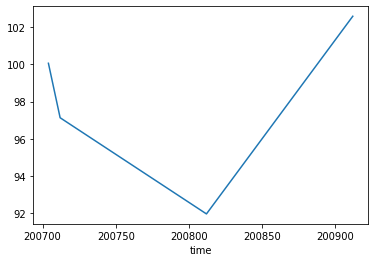

In [3]:
ccss.query("s0=='北京'").groupby("time").index1.mean().plot()

<AxesSubplot:title={'center':'index1'}, xlabel='time'>

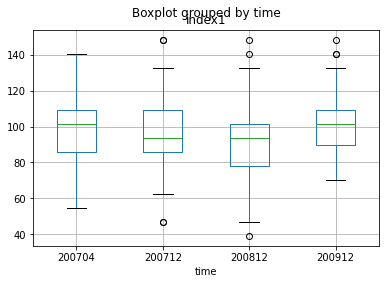

In [4]:
ccss[ccss.s0 == "北京"].boxplot(column="index1",by="time")

In [5]:
a = ccss.query("s0=='北京' & time==200704").index1
b = ccss.query("s0=='北京' & time==200712").index1
c = ccss.query("s0=='北京' & time==200812").index1
d = ccss.query("s0=='北京' & time==200912").index1

In [6]:
import scipy.stats as ss
# 方差齐性检验
ss.levene(a,b,c,d)

LeveneResult(statistic=0.44332330387152036, pvalue=0.7221678627997157)

## 3.2 单因素方差分析

In [7]:
# scipy 实现
ss.f_oneway(a,b,c,d)

F_onewayResult(statistic=5.630155391280303, pvalue=0.0008777240313291846)

In [8]:
# statsmodels实现

import statsmodels.api as sm
from statsmodels.formula.api import ols

ccss.time = ccss.time.astype("str")

model = ols("index1~time",data=ccss.loc[ccss.s0 == "北京", : ]).fit()
restable = sm.stats.anova_lm(model,typ=3)
restable

,sum_sq,df,F,PR(>F)
Intercept,1.001094e+06,1.0,2955.259790,1.227203e-179
time,5.721643e+03,3.0,5.630155,8.777240e-04
Residual,1.266924e+05,374.0,NaN,NaN


## 3.3 多重比较

### LSD法、Sidak法、Bonferroni法、Dunnett法、Tukey法、SNK 法、Duncan法

    1.LSD法 本质上是一种t检验。通常用于1对或者几对专业上有特殊意义的样本均数间的比较
    2.Sidak法 Sidak法的也是一种t检验，计算公式和LSD法的相同。但是Sidak法对α进行了调整。结论趋于接受无效假设，因此该方法要比LSD法保守的多
    3.Bonferroni法 Bonferroni法与Sidak法类似，同样是在LSD法的基础上对α进行了调整。其调整方法基于Bonferroni不等式 一般认为Bonferroni法是最为保守的
    4.Dunnett法 Dunnett法检验统计量为 td，故又称为Dunnett-t检验，实际上该方法的计算与LSD法相同，但是LSD法临界值表基于t分布，而该方法有特殊的临界值表 ，通常用于多个实验组和一个对照组均数的比较。
    5.Tukey法 Tukey法较LSD法保守，即较LSD不易发现显著差异。Tukey法要求比较的样本容量相差不大，一般用于样本容量相同的组之间均数的比较。
    6.SNK 法 SNK法全称Newman–Keuls 或者 Student–Newman–Keuls，属于复极差法（multiple range test），也称为q检验。因而SNK法较Tukey法灵敏（更容易发现显著差异）。另外SNK法又不及LSD法灵敏。
    7.Duncan法 SNK法不同步长下的最小显著极差变幅大，虽然减小了犯Ⅰ类错误的概率，但是同时增加了犯Ⅱ类错误的概率。Duncan法的全称为Duncan's new multiple range test (MRT)，也称为新复极差法。该方法是对SNK法的修正，但是提高了一类错误概率，降低了二类错误的概率，通常用于农业研究。

In [10]:
# statsmodels 
from statsmodels.sandbox.stats import multicomp as mc

poshoc = mc.MultiComparison(ccss.index1,ccss.time)
# tukey法要求比较的样本容量相差不大，一般用于样本容量相同的组之间均数的比较
res = poshoc.tukeyhsd()  # 使用tukeyhsd 对数据进行多重比较  
res

In [11]:
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
200704,200712,-4.1972,0.0597,-8.5083,0.1139,False
200704,200812,-7.897,0.001,-12.2081,-3.5859,True
200704,200912,3.6599,0.1706,-0.9332,8.253,False
200712,200812,-3.6998,0.1198,-7.9966,0.597,False
200712,200912,7.8571,0.001,3.2774,12.4368,True
200812,200912,11.5569,0.001,6.9772,16.1366,True


In [14]:
# scikit_posthocs
import scikit_posthocs as sp
pc = sp.posthoc_conover(ccss,val_col="index1",group_col="time",p_adjust="bonferroni")
pc

,200704,200712,200812,200912
200704,1.000000,0.144102,2.043272e-06,1.000000e+00
200712,0.144102,1.000000,2.434703e-02,1.211434e-02
200812,0.000002,0.024347,1.000000e+00,5.260855e-08
200912,1.000000,0.012114,5.260855e-08,1.000000e+00


        200704  200712  200812  200912
200704    -1.0     0.0     1.0     0.0
200712     0.0    -1.0     3.0     3.0
200812     1.0     3.0    -1.0     1.0
200912     0.0     3.0     1.0    -1.0
-----------


(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x7fe4265f3c10>)

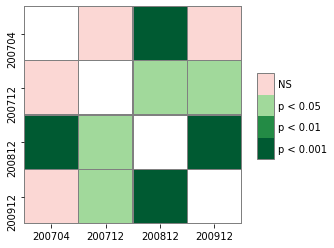

In [16]:
# 使用热力图显示比较结果
heatmap_args = {"linewidths" : 0.25, "linecolor" : "0.5","clip_on" : False,
               "square" : True, "cbar_ax_bbox" : [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)